In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Patch



In [2]:
df = pd.read_excel('Opta.xls')

Preprocessing

In [3]:
rows_missing = df[df['Player Forename'].isnull()]
selected_clumns = ['Player ID', 'Player Surname', 'Player Forename', 'Team']
rows_missing = rows_missing[selected_clumns]
unique_missing = rows_missing['Player Surname'].unique().tolist()

In [4]:
# Filter rows with missing values in the 'Player Forename' column and unique Player Surnames
rows_to_transform = df[df['Player Forename'].isnull() & df['Player Surname'].isin(unique_missing)]

# Define a function to split names
def split_name(full_name):
    if ' ' not in full_name:  # Single name
        return ('', full_name)
    else:
        parts = full_name.split(' ')
        if len(parts) == 2:  # Western name
            return (parts[0], parts[1])
        else:  # Asian name
            return (parts[1], parts[0])  # Swap the positions for Asian names


split_names = rows_to_transform['Player Surname'].apply(split_name).apply(pd.Series)
split_names.columns = ['Player Forename', 'Player Surname']


df.update(split_names)


specific_names = ['Ji Dong-Won', 'Lee Chung-Yong', 'Park Chu-Young', 'Park Ji-Sung']

# Iterate through the DataFrame and swap values for the specific names
for name in specific_names:
    surname, forename = name.split()
    df.loc[df['Player Surname'] == forename, 'Player Surname'], df.loc[df['Player Forename'] == surname, 'Player Forename'] = surname, forename

In [5]:

exclude_columns = [
    'Index', 'Date', 'Player ID', 'Player Surname', 'Player Forename', 'Team',
    'Team Id', 'Opposition', 'Opposition id', 'Venue', 'Position Id',
    'Team Formation', 'Position in Formation', 'CompId', 'SeasId'
]


sum_columns = [col for col in df.columns if col not in exclude_columns]

summarized_df = df.groupby(['Player ID', 'Player Forename', 'Player Surname'])[sum_columns].sum().reset_index()

In [6]:
ylabel = pd.read_excel('Transfermarkt.xlsx')

In [7]:

summarized_df['player_name'] = summarized_df['Player Forename'] + ' ' + summarized_df['Player Surname']

# Some names differ, this variable contains the players where the name differs between the 2 datasets
missing_names = pd.read_excel('Missing Players.xlsx')

# Merge the dataframes based on Player Forename and Player Surname
temp_df = pd.merge(summarized_df, missing_names, on=['Player Forename', 'Player Surname'], how='left', suffixes=('', '_missing'))

# Update player_name in summarized_df with values from 'ylabel name' in missing_names
summarized_df['player_name'] = temp_df['ylabel name'].combine_first(temp_df['player_name'])

filtered_ylabel = ylabel[ylabel['season_start_year'] == 2011]



merged_df = pd.merge(summarized_df, filtered_ylabel[['player_name', 'player_position', 'player_dob', 'player_nationality',
                                                     'player_height_mtrs', 'player_foot', 'player_market_value_euro']],
                     on='player_name', how='left')

In [8]:

merged_df.loc[merged_df['player_name'] == 'David Jones', 'player_position'] = 'Central Midfield'

Create variables

In [9]:

from datetime import datetime
merged_df['player_dob'] = pd.to_datetime(merged_df['player_dob'])

## end of season date 
end_date = datetime(2012, 5, 13)

# Age on end_date
merged_df['age'] = merged_df['player_dob'].apply(lambda dob: (end_date - dob).days // 365)



In [10]:

merged_df['Shots on target excl goals'] = merged_df['Shots On Target inc goals'] - merged_df[ 'Goals']

merged_df is saved as merged_data.csv

Final dataset

In [11]:
df = pd.read_csv("merged_data.csv").dropna()
df.drop(columns=["Player ID","Player Forename","Player Surname","player_name","player_dob"], inplace=True)

Encoding categorical variables

In [12]:
## 72 different nationalities
nationality_count = df['player_nationality'].value_counts()
## Group these per continent due to the low frequency per country, only keep England separate. Central american countries will be put with south america due to low freq.
## Asia and Oceania will be merged into Other
continent_mapping = {'England' : 'England',
                     'Ireland': 'Europe',
                     'France': 'Europe',
                     'Scotland' : 'Europe',
                     'Wales' : 'Europe',
                     'Spain' : 'Europe',
                     'Argentina': 'South America',
                     'Netherlands' : 'Europe',
                     'Nigeria' : 'Africa',
                     'Belgium' : 'Europe',
                     'Senegal': 'Africa',
                     'United States' : 'North America',
                     'Northern Ireland' : 'Europe',
                     'Denmark' : 'Europe',
                     'Portugal' : 'Europe',
                     'Italy' : 'Europe',
                     'Russia' : 'Europe',
                     "Cote d'Ivoire" : 'Africa',
                     'Sweden' : 'Europe',
                     'Cameroon' : 'Africa',
                     'Croatia' : 'Europe',
                     'Ghana' : 'Africa',
                     'Czech Republic' : 'Europe',
                     'Iceland' : 'Europe',
                     'Australia' : 'Other',
                     'Chile' : 'South America',
                     'Serbia' : 'Europe',
                     'Hungary': 'Europe',
                     'Korea, South' : 'Other',
                     'Brazil' : 'South America',
                     'Jamaica' : 'Caribbean',
                     'Greece' : 'Europe',
                     'DR Congo' : 'Africa',
                     'Austria' : 'Europe',
                     'Switzerland' : 'Europe',
                     'Norway' : 'Europe',
                     'Germany' : 'Europe',
                     'Mali' : 'Africa',
                     'Barbados' : 'Caribbean',
                     'Uruguay' : 'South America',
                     'Mexico' : 'North America',
                     'Bosnia-Herzegovina' : 'Europe',
                     'Israel' : 'Other',
                     'Honduras' : 'North America',
                     'Morocco' : 'Africa',
                     'Montenegro' : 'Europe',
                     'Canada' : 'North America',
                     'South Africa' : 'Africa',
                     'French Guiana' : 'South America',
                     'Japan' : 'Other',
                     'Togo' : 'Africa',
                     'Slovenia' : 'Europe',
                     'Algeria' : 'Africa',
                     'Poland' : 'Europe',
                     'Finland' : 'Europe',
                     'Guyana' : 'South America',
                     'Gibraltar' : 'Europe',
                     'Grenada' : 'Caribbean',
                     'Paraguay' : 'South America',
                     'Colombia' : 'South America',
                     'Curacao' : 'Caribbean',
                     'Guadeloupe' : 'Caribbean',
                     'Egypt' : 'Africa',
                     'Costa Rica' : 'South America',
                     'Benin' : 'Africa',
                     'Oman' : 'Other',
                     'Romania' : 'Europe',
                     'Slovakia' : 'Europe',
                     'Ecuador' : 'South America',
                     'Congo' : 'Africa',
                     'Trinidad and Tobago' : 'Caribbean',
                     'Turkey' : 'Europe'
                     }

def country_to_continent(nationality):
    return continent_mapping.get(nationality, 'other')

df['player_continent'] = df['player_nationality'].apply(country_to_continent)

df.drop(columns=["player_nationality"], inplace=True)

Correlation

In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [14]:
# Check if get_dummies or onehotencoder performs best
categorical_columns = ['player_continent', 'player_position', 'player_foot']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [16]:
r2_scores_linear = []
r2_scores_poly = []
r2_scores_xgb = []
r2_scores_rf = []

In [17]:
mse_scores_linear = []
mse_scores_poly = []
mse_scores_xgb = []
mse_scores_rf = []

In [18]:
feat_importances_xgb = []
feat_importances_poly = []


In [19]:
linear_model = LinearRegression()
poly_model = LinearRegression()
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

Correlation

In [21]:
X = df_encoded.drop(columns=['player_market_value_euro'], inplace=False)
y = df['player_market_value_euro']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomizedSearchCV

In [22]:
#random_search = RandomizedSearchCV(xgb_model, param_distributions= params, n_iter=100, scoring='r2', cv=5, verbose=1, n_jobs=-1 )

In [23]:
#random_search.fit(X_train, y_train)

GridSearchCV

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,         # Use all available cores
    random_state=42
)

params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7],
    "n_estimators": [50, 100, 200, 300, 500, 1000]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=params,
    scoring='r2',  
    cv=5,  
    verbose=1,  
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

feat_importances_xgb = best_model.feature_importances_.tolist()

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Test R2: {r2:.3f}")
print(f"Test MAE: {mae:.3f}")


print("Best Estimator:")
print(best_model)


print("Best Estimator Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 34560 candidates, totalling 172800 fits
Best Parameters: {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 100}
Best R2 Score: 0.5804179346030356
Test R2: 0.438
Test MAE: 3084481.544
Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree

In [26]:
feat_importances_xgb = list(zip(X_train.columns, best_model.feature_importances_))
feat_importances_xgb.sort(key=lambda x: x[1], reverse=True)  # Sorting by importance, descending


Visualizations

In [32]:
posplot = df['player_position'].value_counts()

In [30]:
natplot2 = df['player_continent'].value_counts()

C:\Users\damon\AppData\Local\Temp\ipykernel_25408\2565395672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=natplot2.index, y=natplot2.values, palette='viridis')  # Seaborn bar plot


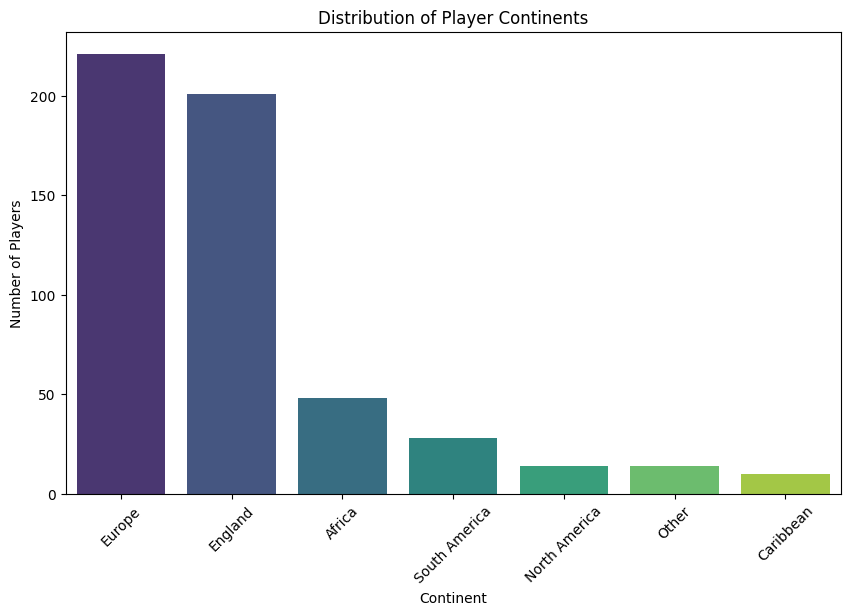

In [31]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=natplot2.index, y=natplot2.values, palette='viridis')
plt.title('Distribution of Player Continents') 
plt.xlabel('Continent') 
plt.ylabel('Number of Players')
plt.xticks(rotation=45) 
plt.show()  

C:\Users\damon\AppData\Local\Temp\ipykernel_25408\997446611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=posplot.index, y=posplot.values, palette='viridis')


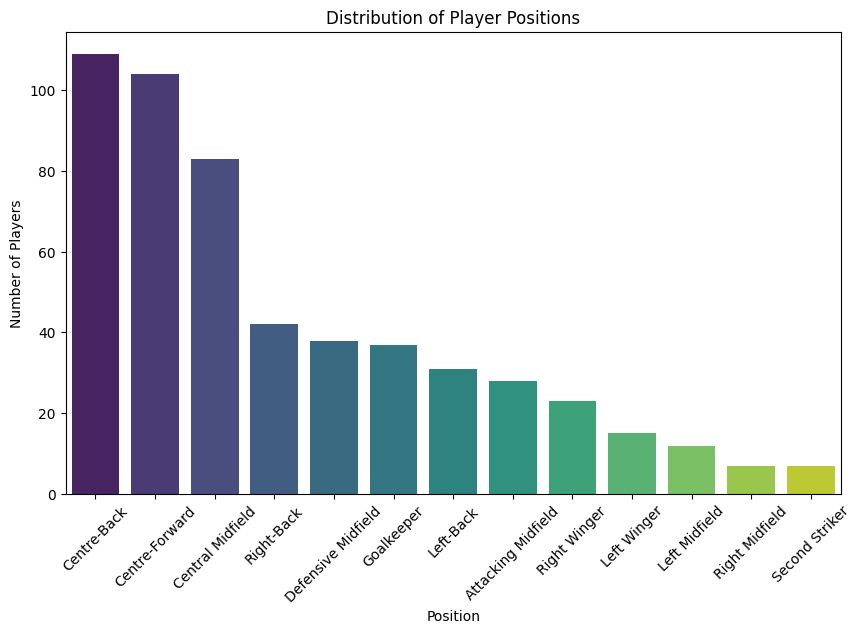

In [33]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=posplot.index, y=posplot.values, palette='viridis')
plt.title('Distribution of Player Positions') 
plt.xlabel('Position') 
plt.ylabel('Number of Players')
plt.xticks(rotation=45) 
plt.show()  

C:\Users\damon\AppData\Local\Temp\ipykernel_25408\1826465062.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.1f}M'.format(x/1e6) for x in ticks])


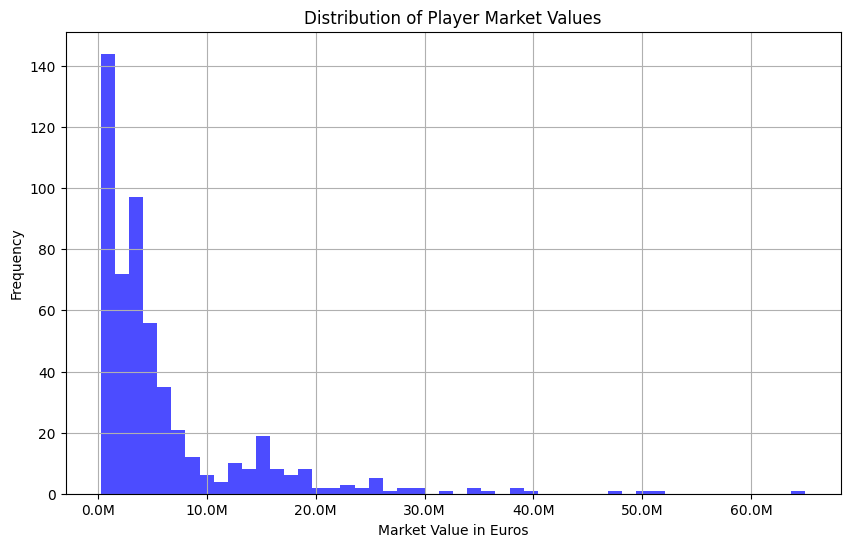

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['player_market_value_euro'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Player Market Values')
plt.xlabel('Market Value in Euros')
plt.ylabel('Frequency')
plt.grid(True)


# Improve tick labels to show in millions
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x/1e6) for x in ticks])

plt.show()

C:\Users\damon\AppData\Local\Temp\ipykernel_25408\3107257091.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.1f}M'.format(x/1e6) for x in ticks])


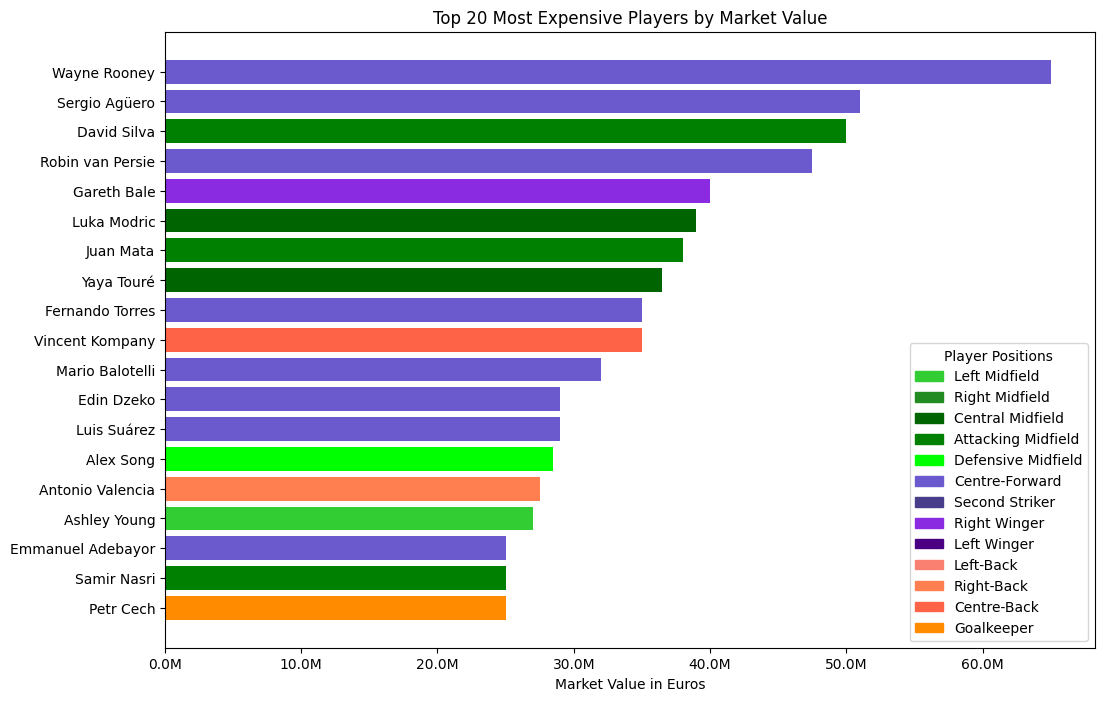

In [67]:
colormap = { 'Left Midfield': 'limegreen',
            'Right Midfield': 'forestgreen',
            'Central Midfield': 'darkgreen',
            'Attacking Midfield': 'green',
            'Defensive Midfield': 'lime', 
            'Centre-Forward': 'slateblue',
            'Second Striker': 'darkslateblue', 
            'Right Winger': 'blueviolet', 
            'Left Winger': 'indigo',
            'Left-Back': 'salmon',
            'Right-Back': 'coral',
            'Centre-Back': 'tomato',
            'Goalkeeper': 'darkorange'
}

top_players = merged_df.sort_values(by='player_market_value_euro', ascending=False).head(20)

bar_colors = [colormap.get(position, 'grey') for position in top_players['player_position']]
legend_handles = [Patch(color=color, label=label) for label, color in colormap.items()]

plt.figure(figsize=(12, 8))  
plt.barh(top_players['player_name'], top_players['player_market_value_euro'], color=bar_colors)  
plt.xlabel('Market Value in Euros')  
plt.title('Top 20 Most Expensive Players by Market Value')  
plt.gca().invert_yaxis()  
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x/1e6) for x in ticks])
plt.legend(handles=legend_handles, loc='lower right', title="Player Positions")
plt.show()

In [71]:
interested_features = [
    'player_continent_South America', 'player_continent_England', 
    'player_continent_Europe', 'player_continent_Other', 
    'player_continent_Caribbean', 'player_continent_North America',
    'Left Midfield', 'Central Midfield', 'Centre-Back', 'Centre-Forward',
    'Right Winger', 'Left Winger', 'Right Midfield', 'Attacking Midfield',
    'Left-Back', 'Goalkeeper', 'Defensive Midfield', 'Second Striker', 'Right-Back'
]

## TIME FOR SHAP - FEATURE IMPORTANCE VIZUALS

SHAP

In [78]:
import shap
shap.initjs()

In [142]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
# Find the indices of the interested features in X_test
feature_indices = [X_test.columns.get_loc(feature) for feature in interested_features if feature in X_test.columns]
mean_shap_values = np.mean(shap_values[:, feature_indices], axis=0)
filtered_feature_names = [X_test.columns[i] for i in feature_indices]

XGBoostError: [21:37:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api_utils.h:125: Check failed: std::accumulate(shape.cbegin(), shape.cend(), static_cast<bst_ulong>(1), std::multiplies<>{}) == chunksize * rows (3672 vs. 23868) : 

Mean SHAP values for player_continent variable

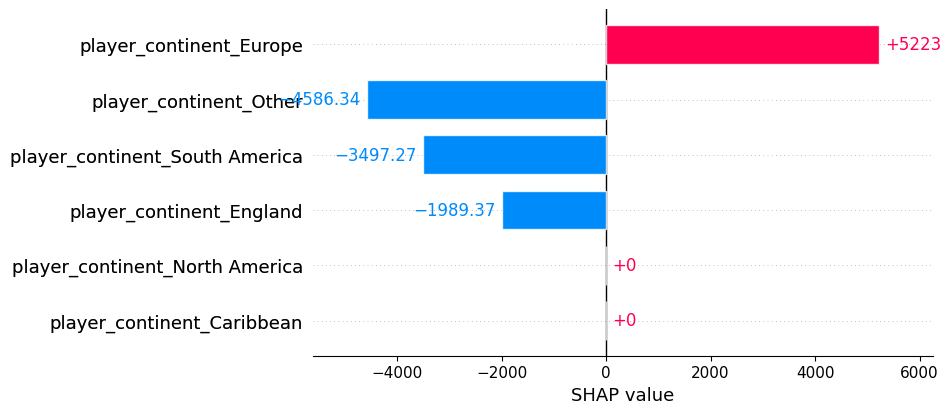

In [93]:
mean_shap_explanation = shap.Explanation(values=mean_shap_values, base_values=explainer.expected_value, feature_names=filtered_feature_names)
shap.plots.bar(mean_shap_explanation)




In [ ]:
shap.plots.bar(shap_explanation, max_display= 33)

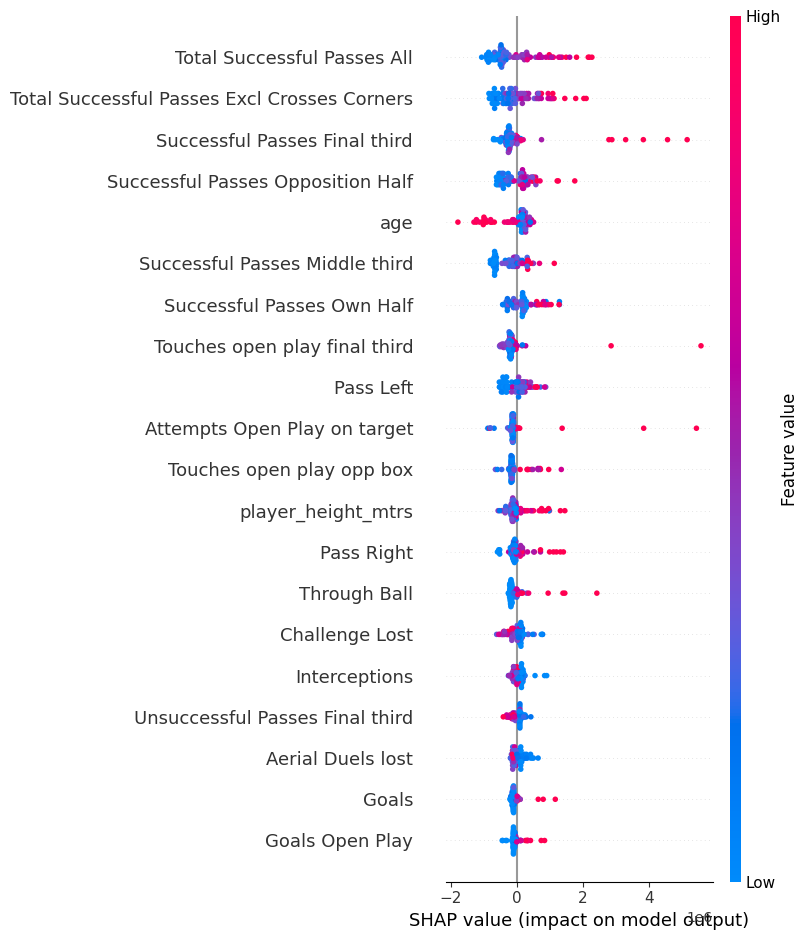

In [86]:
shap.summary_plot(shap_values, X_test)



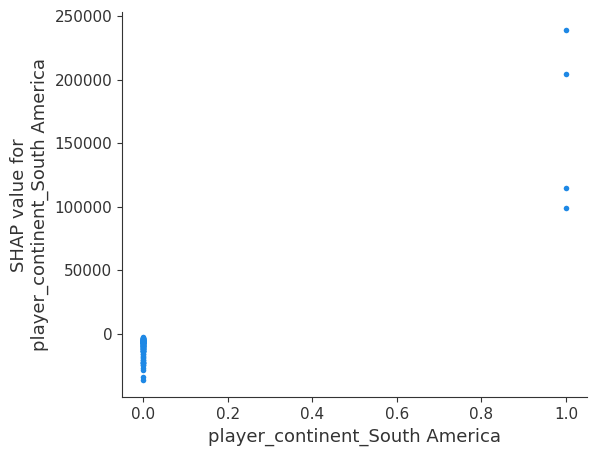

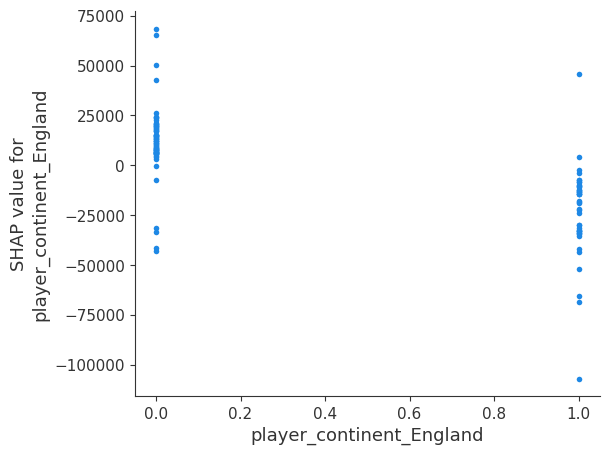

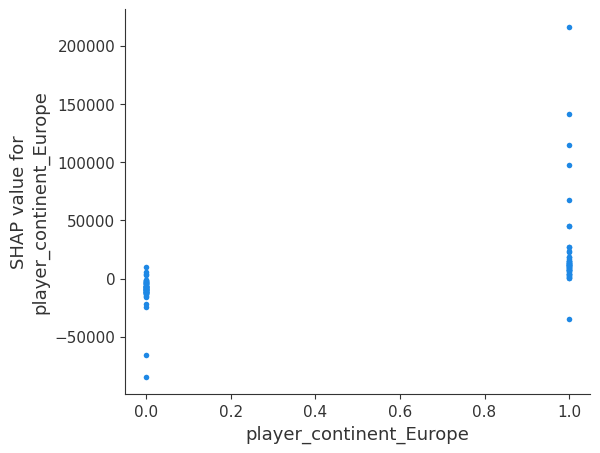

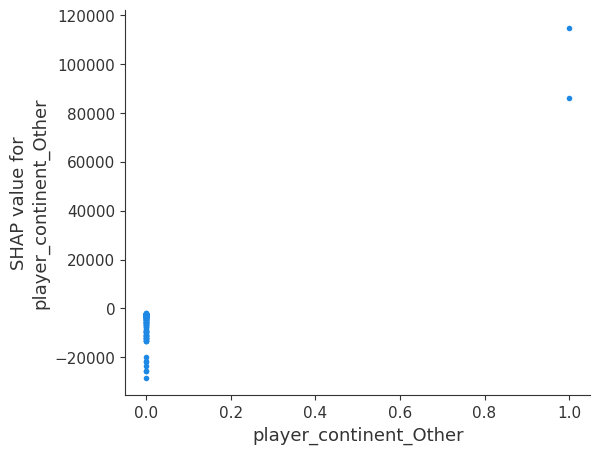

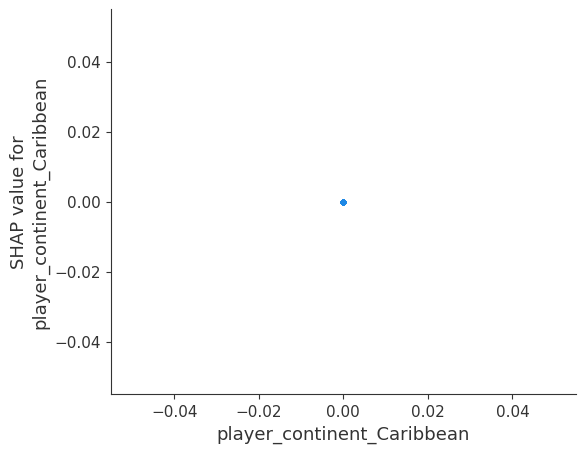

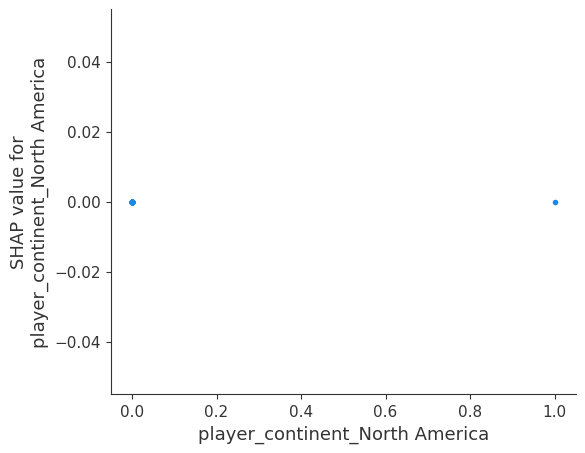

In [88]:
for feature in ['player_continent_South America', 'player_continent_England', 
    'player_continent_Europe', 'player_continent_Other', 
    'player_continent_Caribbean', 'player_continent_North America']:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)



In [94]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

XGBoost Selected features

In [97]:
xgb2_features = [
    'Successful Passes Final third', 'Successful Passes Middle third',
    'Touches open play final third', 'Touches open play opp box',
    'Attempts Open Play on target', 'age', 'player_height_mtrs', 'Through Ball',
    'Goals', 'Assists', 'Challenge Lost', 'Interceptions', 'Aerial Duels lost',
    'Saves Made from Inside Box', 'Goals Conceded',
    'player_continent_South America', 'player_continent_England',
    'player_continent_Europe', 'player_continent_Other',
    'player_continent_Caribbean', 'player_continent_North America',
    'player_position_Left-Back', 'player_position_Central Midfield',
    'player_position_Right Winger', 'player_position_Right-Back',
    'player_position_Second Striker', 'player_position_Goalkeeper',
    'player_position_Defensive Midfield', 'player_position_Left Midfield',
    'player_position_Centre-Forward', 'player_position_Centre-Back',
    'player_position_Left Winger', 'player_position_Right Midfield'
]
X = df_encoded[xgb2_features]
y = df_encoded['player_market_value_euro']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=3,         # Use 3 cores beacause last time my CPU went to 85 degrees
    random_state=42
)

params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7],
    "n_estimators": [50, 100, 200, 300, 500, 1000]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=params,
    scoring='r2',  
    cv=5,  
    verbose=1,  
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")


best_model2 = grid_search.best_estimator_
predictions2 = best_model2.predict(X_test)

feat_importances_xgb2 = best_model2.feature_importances_.tolist()

r2_2 = r2_score(y_test, predictions2)
mae_2 = mean_absolute_error(y_test, predictions2)

print(f"Test R2: {r2_2:.3f}")
print(f"Test MAE: {mae_2:.3f}")


print("Best Estimator:")
print(best_model2)


print("Best Estimator Parameters:")
print(best_model2.get_params())

Fitting 5 folds for each of 34560 candidates, totalling 172800 fits
Best Parameters: {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 300}
Best R2 Score: 0.5952094318264469
Test R2: 0.437
Test MAE: 3089503.998
Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=3,
             num_parallel_tree=

XGBoost 2 evaluation SHAP

In [124]:

explainer2 = shap.TreeExplainer(best_model2)
shap_values2 = explainer2.shap_values(X_test)

interested_features = [
    'player_continent_South America', 'player_continent_England', 
    'player_continent_Europe', 'player_continent_Other', 
    'player_continent_Caribbean', 'player_continent_North America'
]

feature_indices2 = [X_test.columns.get_loc(feature) for feature in interested_features if feature in X_test.columns]
mean_shap_values2 = np.mean(shap_values2[:, feature_indices2], axis=0)
filtered_feature_names2 = [X_test.columns[i] for i in feature_indices2]
shap_explanation2 = shap.Explanation(values =shap_values2, base_values=explainer2.expected_value, feature_names=X_test.columns)
mean_shap_explanation2 = shap.Explanation(values=mean_shap_values2, base_values=explainer2.expected_value, feature_names=filtered_feature_names2)


Mean SHAP values for player_continent variable

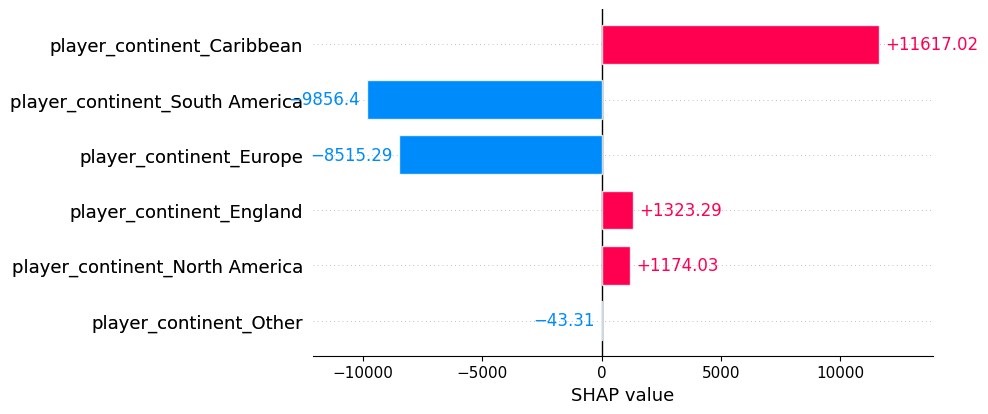

In [117]:
shap.plots.bar(mean_shap_explanation2)

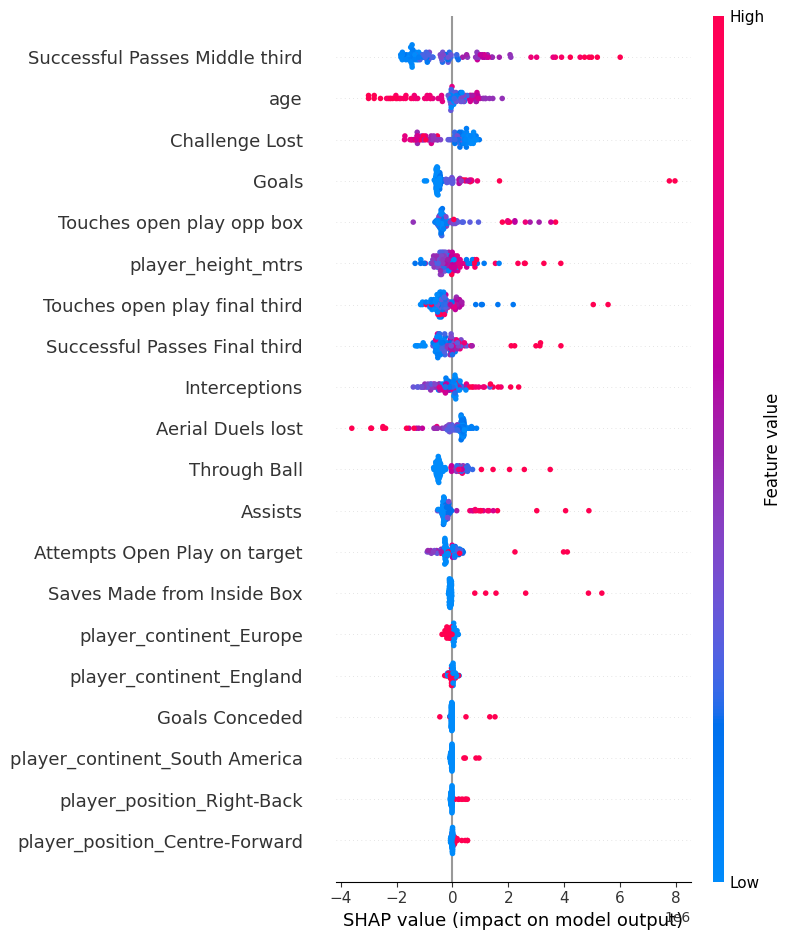

In [118]:
shap.summary_plot(shap_values2, X_test)

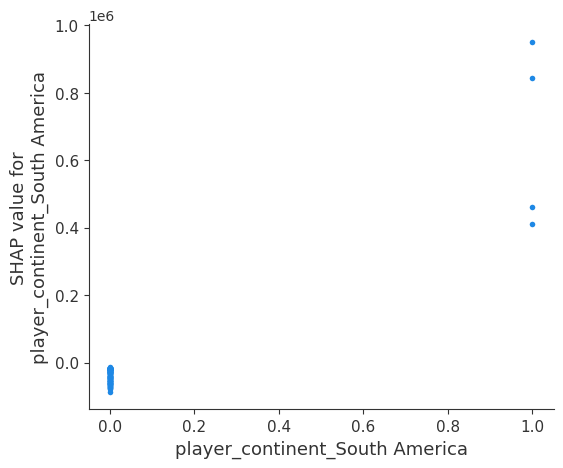

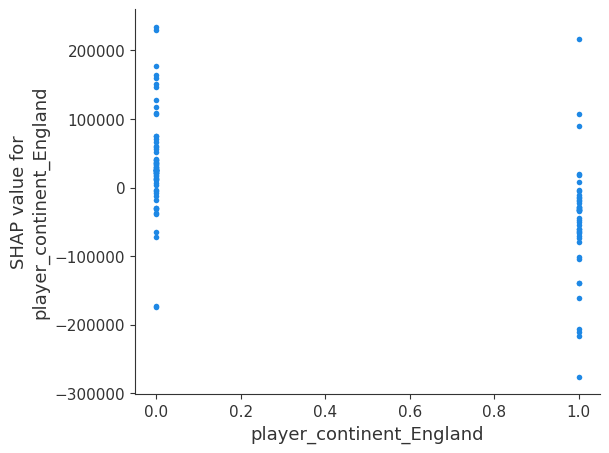

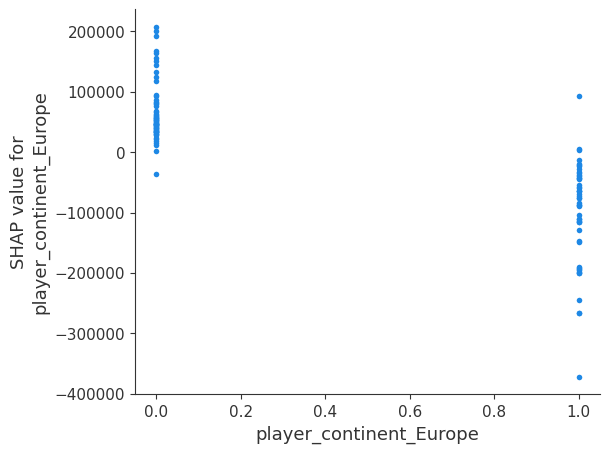

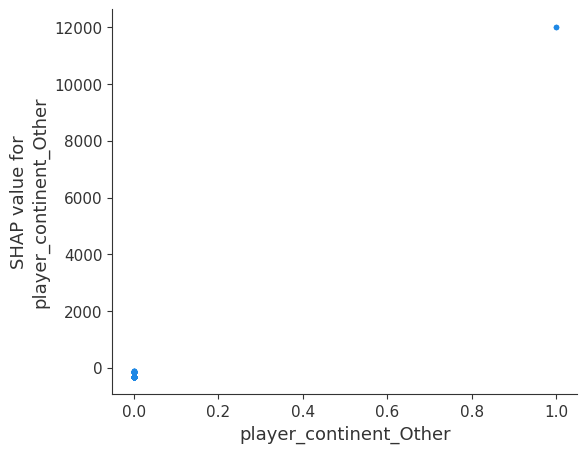

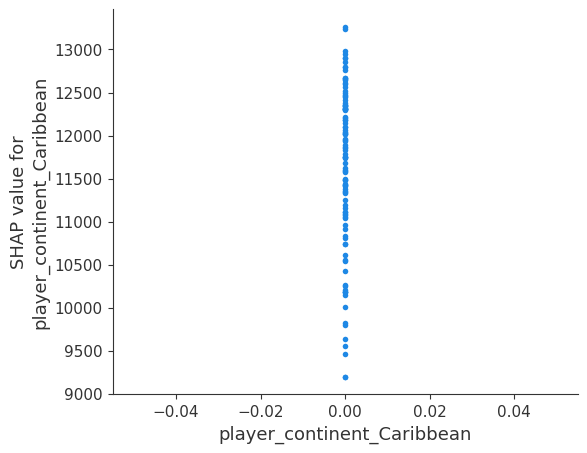

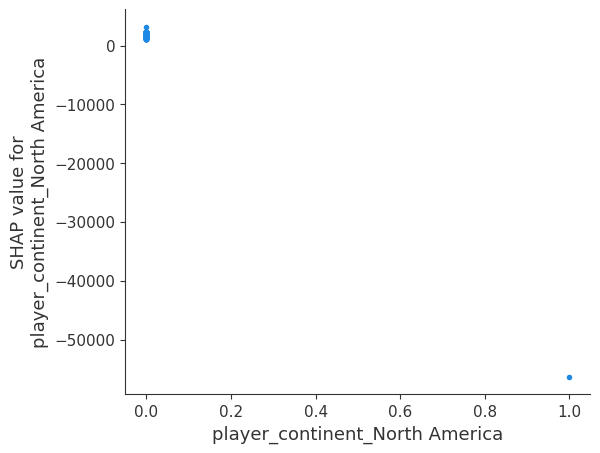

In [119]:
for feature in interested_features:
    shap.dependence_plot(feature, shap_values2, X_test, interaction_index=None)

XGB evaluation version 1 & 2

In [99]:
errorsxgb_all = predictions - y_test
errorsxgb_selected = predictions2 - y_test

C:\Users\damon\AppData\Local\Temp\ipykernel_25408\2781478255.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.1f}M'.format(x/1e6) for x in ticks])


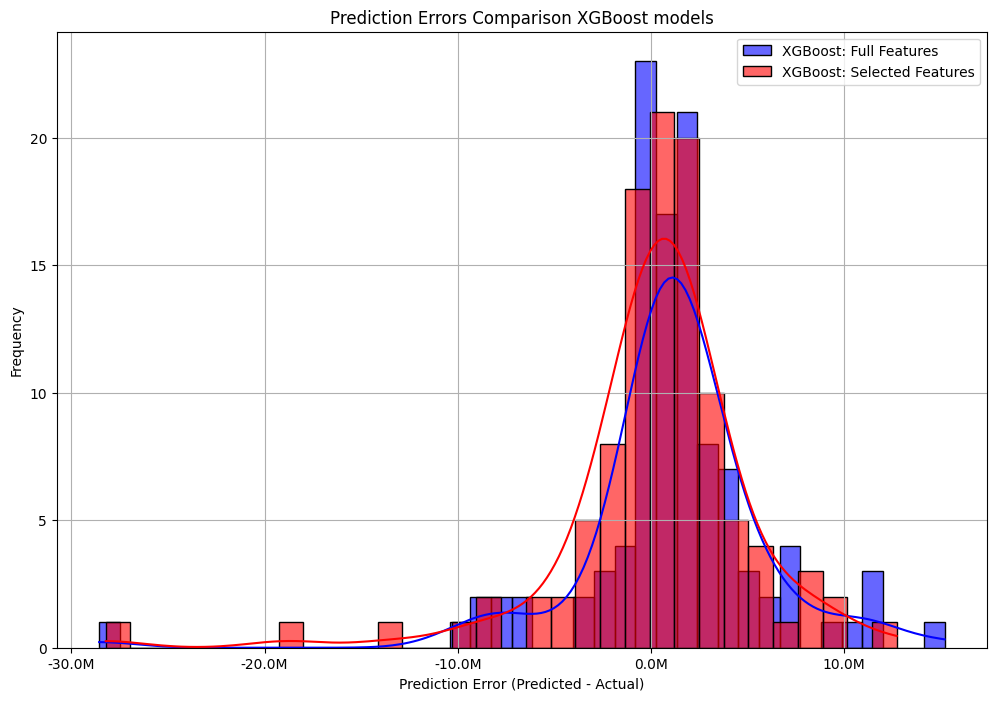

In [102]:

plt.figure(figsize=(12, 8))
sns.histplot(errorsxgb_all, color='blue', kde=True, label='XGBoost: Full Features', alpha=0.6)
sns.histplot(errorsxgb_selected, color='red', kde=True, label='XGBoost: Selected Features', alpha=0.6)
plt.title('Prediction Errors Comparison XGBoost models')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.legend()
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x/1e6) for x in ticks])
plt.grid(True)
plt.show()


C:\Users\damon\AppData\Local\Temp\ipykernel_25408\756551408.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.1f}M'.format(t/1e6) for t in ticks])
C:\Users\damon\AppData\Local\Temp\ipykernel_25408\756551408.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.1f}M'.format(t/1e6) for t in plt.gca().get_yticks()])


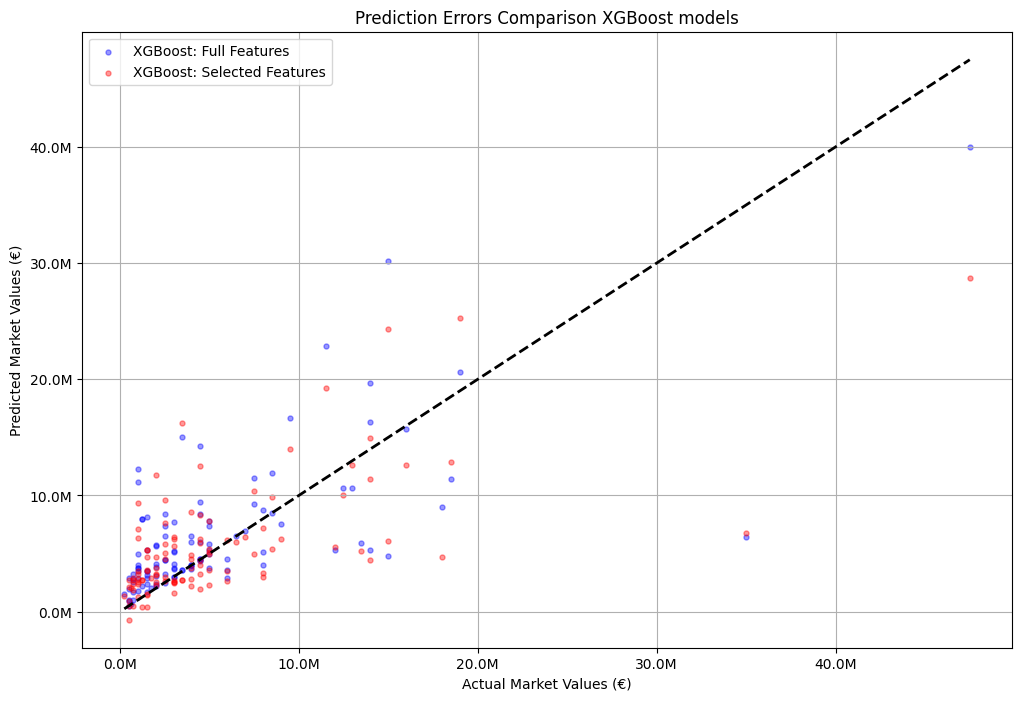

In [143]:

plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions, alpha=0.4, color='blue', s=13, label='XGBoost: Full Features')
plt.scatter(y_test, predictions2, alpha=0.4, color='red', s=13, label='XGBoost: Selected Features')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Prediction Errors Comparison XGBoost models')
plt.xlabel('Actual Market Values (€)')
plt.ylabel('Predicted Market Values (€)')
plt.legend()
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(t/1e6) for t in ticks])
plt.gca().set_yticklabels(['{:.1f}M'.format(t/1e6) for t in plt.gca().get_yticks()])
plt.grid(True)
plt.show()


Save models & outputs

In [144]:
import joblib

In [145]:
joblib.dump(best_model, 'best_model_XGB1.joblib')
joblib.dump(best_model2, 'best_model2_XGB2.joblib')

joblib.dump(shap_values, 'shap_values_XGB1.joblib')
joblib.dump(shap_values2, 'shap_values2_XGB2.joblib')

['shap_values2_XGB2.joblib']

In [146]:
np.save('predictions_XGB1.npy', predictions)
np.save('predictions_XGB2.npy', predictions2)

In [147]:
np.save('feature_importances_XGB1.npy', best_model.feature_importances_)
np.save('feature_importances_XGB2.npy', best_model2.feature_importances_)
